<a href="https://colab.research.google.com/github/atulghunavat/atul_INFO5731_Spring2020/blob/master/Assignment%204/INFO5731_Assignment_Four_Atul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [0]:
# Write your code here
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from gensim import corpora, models
from collections import Counter
import warnings

warnings.filterwarnings("ignore",category=DeprecationWarning)

df = pd.read_csv('https://raw.githubusercontent.com/atulghunavat/atul_INFO5731_Spring2020/master/amazonreviews_labled_sentiments.csv')

In [40]:
list_of_tokens = []
tokenizer = RegexpTokenizer(r'\w+')
for i in df['clean_text']:
    # clean and tokenize document string
    raw = i.lower()
    list_of_tokens.append(tokenizer.tokenize(raw))

phrases_model = models.Phrases(list_of_tokens, min_count=2, threshold=1)
ngram = models.phrases.Phraser(phrases_model=phrases_model)
ngram_list = [ngram[sent] for sent in list_of_tokens]

words=[]
for k in ngram_list:
  for m in k:
    words.append(m)
matching = [s for s in words if "_" in s]
counter = Counter(matching)
print('#1.1: Features (top n-gram phrases) used for topic modeling.')
for words,count in counter.items():
  print(words,count)

#1.1: Features (top n-gram phrases) used for topic modeling.
hard_drive 5
recommend_laptop 3
best_laptop 3
new_laptop 2
touch_screen 4
warranti_expir 3
brand_new 4
good_laptop 3
work_great 3


In [41]:
dictionary_LDA = corpora.Dictionary(ngram_list)
# dictionary_LDA.filter_extremes(no_below=5)
corpus = [dictionary_LDA.doc2bow(tokens) for tokens in ngram_list]

num_topics = 10
lda_model = models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary_LDA, passes=4, alpha='auto')
print('#1.2: Top 10 clusters for topic modeling.')
for topic in lda_model.print_topics():
  print(topic)

#1.2: Top 10 clusters for topic modeling.
(0, '0.015*"laptop" + 0.015*"order" + 0.015*"work" + 0.015*"money" + 0.015*"back" + 0.015*"would" + 0.015*"purchas" + 0.008*"fast" + 0.008*"use" + 0.008*"el"')
(1, '0.024*"laptop" + 0.024*"fast" + 0.016*"fan" + 0.016*"dell" + 0.012*"one" + 0.011*"use" + 0.011*"comput" + 0.011*"didnt" + 0.011*"bought" + 0.010*"love"')
(2, '0.019*"laptop" + 0.016*"upgrad" + 0.015*"look" + 0.013*"mbp" + 0.012*"like" + 0.012*"one" + 0.010*"speed" + 0.010*"need" + 0.010*"use" + 0.010*"dell"')
(3, '0.026*"littl" + 0.020*"dell" + 0.014*"fast" + 0.014*"issu" + 0.014*"amaz" + 0.014*"laptop" + 0.014*"wish" + 0.013*"touchscreen" + 0.013*"far" + 0.008*"screen"')
(4, '0.017*"nice" + 0.017*"screen" + 0.017*"keyboard" + 0.016*"fast" + 0.015*"use" + 0.009*"best_laptop" + 0.009*"one" + 0.009*"lit" + 0.009*"drive" + 0.009*"run"')
(5, '0.029*"comput" + 0.023*"great" + 0.018*"fast" + 0.018*"work" + 0.018*"use" + 0.018*"dell" + 0.012*"laptop" + 0.012*"need" + 0.012*"tb" + 0.012*"st

Cluster description:

1) About laptop performance

2) laptop comparison

3) good review

4) About quick delivery of product

5) Defines laptop specifications

6) Happy customer review

7) Describes laptop worth

8) Damaged product received

9) Negative review with product return

10) Laptop description

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [42]:
# Write your code here
import numpy as np
from sklearn import model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

clean = df['clean_text']
sentiment = df['sentiment']

#Split Training 80% and Test 20%
train_clean, test_clean, train_sentiment, test_sentiment = model_selection.train_test_split(clean, sentiment, test_size=0.2, random_state=1000)

#Feature extraction
vectorizer = TfidfVectorizer(ngram_range=(1,3), stop_words='english', max_features=1000)
matrix = vectorizer.fit(clean)
train_clean_tfidf = vectorizer.transform(train_clean)
test_clean_tfidf = vectorizer.transform(test_clean)
feature = vectorizer.get_feature_names()
print("#1.1 Features used for sentimental analysis")
print((feature))

#1.1 Features used for sentimental analysis
['abl', 'absolut', 'absolut love', 'actual', 'ad', 'advertis', 'agent', 'amaz', 'amazon', 'anymor', 'app', 'applic', 'arriv', 'background', 'backlit', 'base', 'batteri', 'best', 'best laptop', 'better', 'bewar', 'bit', 'boot', 'bootup', 'bought', 'bought laptop', 'box', 'brand', 'brand new', 'budget', 'buy', 'came', 'chrome', 'click', 'close', 'comfort', 'complaint', 'complet', 'comput', 'connect', 'cost', 'damag', 'data', 'daughter', 'day', 'definit', 'deliv', 'dell', 'dell best', 'descript', 'develop', 'didnt', 'difficult', 'display', 'doesnt', 'dont', 'dont use', 'download', 'drive', 'easi', 'easi use', 'el', 'error', 'ethernet', 'everyth', 'excel', 'expect', 'expir', 'extra', 'fan', 'far', 'fast', 'fast quiet', 'faster', 'feel', 'final', 'fine', 'gener', 'gift', 'god', 'good', 'good comput', 'good laptop', 'got', 'great', 'half', 'happi', 'hard', 'hard drive', 'havent', 'hdd', 'hear', 'heard', 'heat', 'heavi', 'hope', 'hour', 'im', 'im ha

We used tf-idf vectorizer to select the fetures. A common technique to extract features from a text is the BOW(Bag of words) approach. This approach does not account for words that have little meaning to the text and are necessary for sentence formulation. Tf-idf considers the relative importance of the words in the text. Tf means the number of times the word appear in the document divided by the total number of documents. Idf means the log of number of documents divided by the number of documents that contain the words. Idf determines the weight of rare words across all documents.

In [0]:
#1.2 Naive Bayes ComplementNB
cnb = naive_bayes.ComplementNB()
cnb.fit(train_clean_tfidf, train_sentiment)
predict_cnb = cnb.predict(test_clean_tfidf)

In [0]:
#1.2 Support Vector Machine Classification
svc = svm.SVC()
svc.fit(train_clean_tfidf, train_sentiment)
predict_svc = svc.predict(test_clean_tfidf)

In [46]:
report_naive_bayes = classification_report(test_sentiment, predict_cnb, target_names=["negative","neutral", "positive"])
print(report_naive_bayes)

              precision    recall  f1-score   support

    negative       0.67      1.00      0.80         2
     neutral       0.00      0.00      0.00         1
    positive       0.91      0.77      0.83        13

    accuracy                           0.75        16
   macro avg       0.53      0.59      0.54        16
weighted avg       0.82      0.75      0.78        16



In [47]:
report_svm = classification_report(test_sentiment, predict_svc, target_names=["negative","neutral", "positive"])
print(report_svm)

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
     neutral       0.00      0.00      0.00         1
    positive       0.81      1.00      0.90        13

    accuracy                           0.81        16
   macro avg       0.27      0.33      0.30        16
weighted avg       0.66      0.81      0.73        16



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



I have divide data into two sets training and testing to be used in two models - Support vector machine and Navie Bayes. From the above results of two models, we can say SVM is better than NB but these models might not be reliable due to the imbalance of the review lables.

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [48]:
# Write your code here
import pandas as pd
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [49]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [50]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [51]:
corr = train_df.corr()
corr["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

- From above correlation matrix we see that the SalePrice is highly correlated with 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea' and 'TotalBsmtSF'.
- Based on the desciption 'GarageCars' and 'GarageArea' are directly proportional so we can choose one of the two variables.

In [0]:
import plotly.express as px
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
import numpy as np

In [53]:
fig = px.scatter_matrix(train_df, dimensions=["SalePrice", "OverallQual", "GrLivArea", "GarageArea", "TotalBsmtSF"])
fig.show()

In the above scatter plot matrix we can see the linear relationship between the highly correlated variables. 

Now, lets look at the couple of highly correlated variables to understand the relationship between those variables and SalePrice.

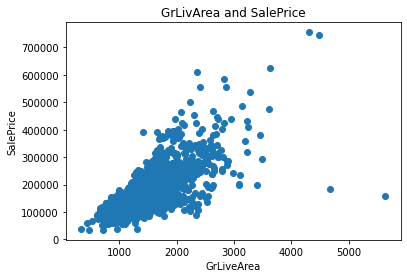

In [54]:
xData = train_df.GrLivArea
yData = train_df.SalePrice
# Draw the scatter plot
plot.scatter(xData, yData)
plot.title('GrLivArea and SalePrice')
plot.xlabel('GrLiveArea')
plot.ylabel('SalePrice')
plot.show()

From the above we can see that as the GrLivArea value increses the SalePrice increases. That means larger the living area higher the sale price.

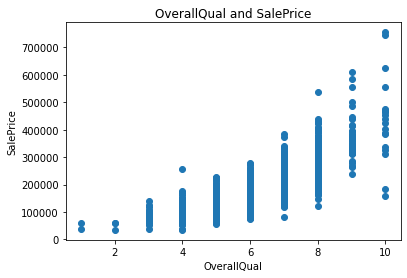

In [55]:
xData = train_df.OverallQual
yData = train_df.SalePrice
# Draw the scatter plot
plot.scatter(xData, yData)
plot.title('OverallQual and SalePrice')
plot.xlabel('OverallQual')
plot.ylabel('SalePrice')
plot.show()

From the above we can see that as the OverallQual value increses the SalePrice increases. That means better the overall quality higher the sale price.

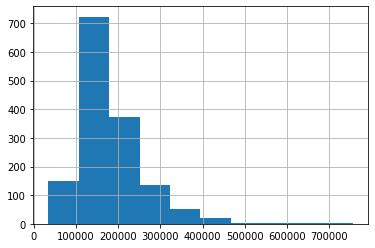

In [56]:
train_df.SalePrice.hist()

From the above histogram we can see that the distribution of SalePrice is right skewed.

In [57]:
print(train_df['SalePrice'].skew())
train_df['SalePrice'].describe()

1.8828757597682129


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The skewness value of 1.8 shows that the variable 'SalePrice' has a right-skewed distribution, indicating the presence of extreme higher values. The maximum 'SalePrice' value of 755,000 proves this point.

In [58]:
#correcting skewness with log function
train_df['SalePrice'] = np.log(train_df.SalePrice + 1)
print(train_df['SalePrice'].skew())
train_df['SalePrice'].describe()

0.12134661989685329


count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

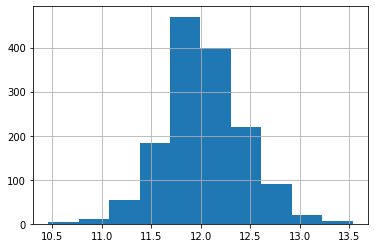

In [59]:
train_df.SalePrice.hist()

In the above histogram we can see the very less skewness with much less skewness value.

In [0]:
#To fix missing/null values of train dataset
train_df = train_df.select_dtypes(include=[np.number]).interpolate().dropna()

In [0]:
#Dropping SalePrice from x, since it is dependant variable
x = train_df.drop(['SalePrice'], axis=1)
y = train_df['SalePrice']

In [0]:
#Divinding dataset into two parts - training & testing
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.2, random_state =41)

In [0]:
#Creating LineraRegression object
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [0]:
#Fitting into model
lr.fit(x_train,y_train)

In [0]:
#Predicting output for test subset
pred = lr.predict(x_test)

In [66]:
#Testing the accuracy of the model
lr.score(x_test,y_test)

0.8765511833778493

It shows our model is accurate up to 87% of the time.

In [67]:
#Checking RMSE value of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, pred))
rmse

0.13318703481875424

RMSE is the measure of difference between the actual and predicted values. This value should be closer to 0 for a good model. Our value is 0.13 which is satisfactory.

Text(0, 0.5, 'Predictions')

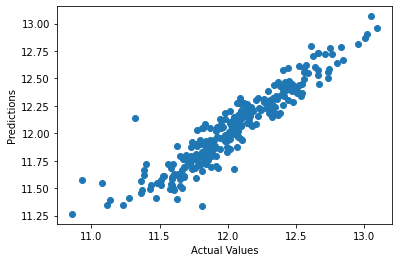

In [68]:
#Scatter plot to visualize the output of the predicted value against output value of the training dataset
plot.scatter(y_test, pred)
plot.xlabel('Actual Values')
plot.ylabel('Predictions')

In [0]:
#To fix missing/null values of test dataset
test_df = test_df.select_dtypes(include=[np.number]).interpolate().dropna()

In [70]:
#Applying above model to predict SalePrice of test dataset
final_df = pd.DataFrame()
pred_data = lr.predict(test_df)
final_sale = np.exp(pred_data)
final_df['Predicted_SalePrice'] = final_sale
final_df

,Predicted_SalePrice
0,117696.926130
1,135931.065445
2,167311.922168
3,194500.131787
4,183629.305763
...,...
1454,94516.907508
1455,94989.033232
1456,174307.606720
1457,110716.834721
